<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_6_1_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
sns.set(
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize': (20, 7)}
)

1) Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:<br>
Date — дата<br>
AveragePrice — средняя цена одного авокадо<br>
Total Volume — количество проданных авокадо<br>
4046 — количество проданных авокадо PLU* 4046<br>
4225 — количество проданных авокадо PLU 4225<br>
4770 — количество проданных авокадо PLU 4770<br>
Total Bags — всего упаковок<br>
Small Bags — маленькие упаковки<br>
Large Bags — большие<br>
XLarge Bags — очень большие<br>
type — обычный или органический<br>
year — год<br>
Region — город или регион the city or region of the observation<br>
*PLU — код товара (Product Lookup code)<br>
*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:<br>
avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64


In [2]:
avocado_mean = pd.read_csv('avocado_mean.csv')

In [3]:
avocado_mean['Date'] = pd.to_datetime(avocado_mean.Date) #перевели колонку время в формат даты

In [7]:
avocado_mean.head(5)

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [8]:
avocado_mean.info() #информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [32]:
avocado_mean = avocado_mean.sort_values('Date', ascending=True) #отсортировали по дате

2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [33]:
avocado_mean['SMA3'] = avocado_mean.AveragePrice.rolling(3).mean() #добавили скользящую среднюю с окном 3 в отдельный столбец

In [38]:
avocado_mean.SMA3.max().round(2) #максимальное значение скользящей средней, округлённое до 2 знаков после запятой

1.85

3) Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.<br>
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)
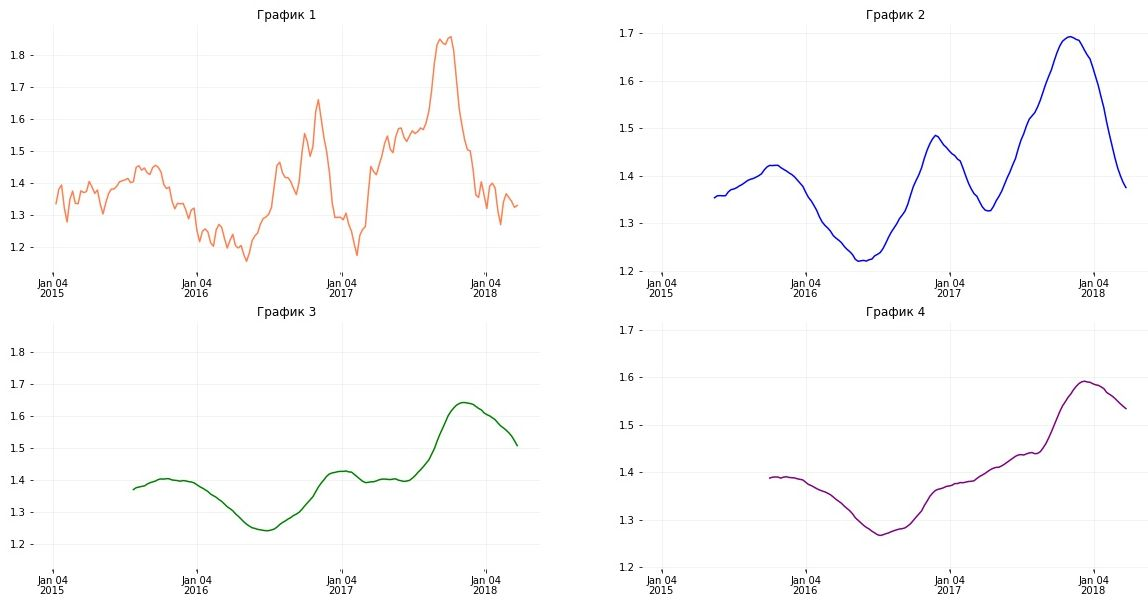


In [41]:
av_SMA = avocado_mean[['Date', 'AveragePrice']].set_index('Date')

<Axes: xlabel='Date'>

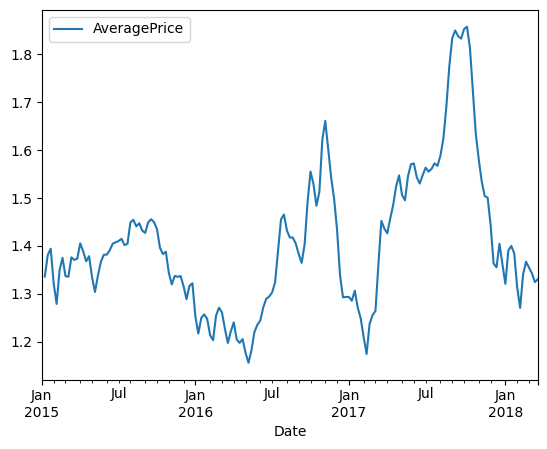

In [43]:
av_SMA.rolling(2).mean().plot()#график скользящего среднего с значениeм параметра window 2

<Axes: xlabel='Date'>

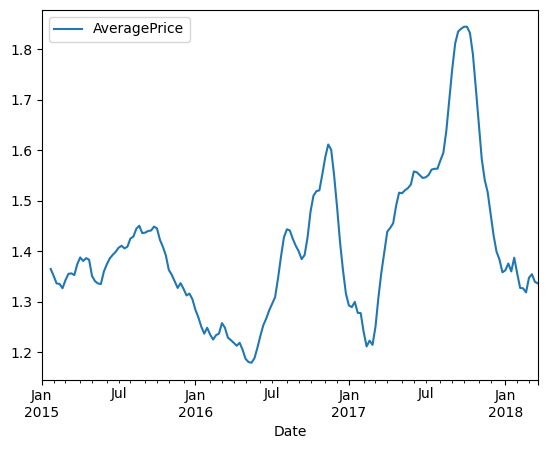

In [44]:
av_SMA.rolling(4).mean().plot()#график скользящего среднего с значениeм параметра window 4

<Axes: xlabel='Date'>

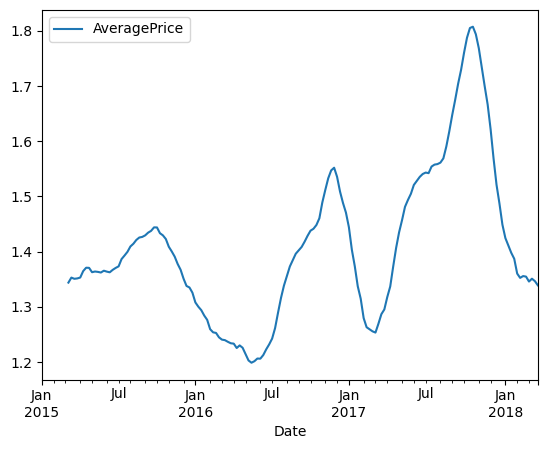

In [45]:
av_SMA.rolling(10).mean().plot()#график скользящего среднего с значениeм параметра window 10

<Axes: xlabel='Date'>

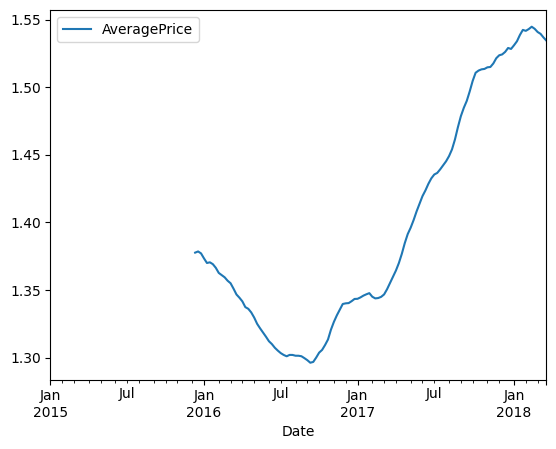

In [46]:
av_SMA.rolling(50).mean().plot()#график скользящего среднего с значениeм параметра window 50

4) ⭐️Задание со звёздочкой!⭐️<br>
​​​​Изучите параметры функций:<br>
- axis<br>
- center<br>
- closed<br>
- min_periods<br>
- on<br>
- win_type<br>
- window<br>
в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.


In [ ]:
# axis - используется, когда нужно перечислить значения (0) по столбцам, (1) по строкам
#center - используется, если нужно добавить знаки до и после значения (поставить значение по-центру)
#closed - определяет где закрыть интерфвал right, left, both или neither. Дефолтный right
#min_periods - задаёт минимальное количество наблюдений в окне
#on - индекс или колонка, из которой вычислять скользящую среднюю
#win_type - задаёт тип окна, например, Гауссово (нормальное)
#window - задаёт размер 'окна' для скользящих средних

#хорошая статья: https://konstantinklepikov.github.io/myknowlegebase/notes/pandas-rolling-window.html?ysclid=lwqaijqixa306838424

5) ⭐️Задание со звёздочкой!⭐️<br>
Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.


In [5]:
avocado_mean.head(5)

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [6]:
avocado_mean['EWM'] = avocado_mean.AveragePrice.ewm(span= 2, adjust= False).mean()

In [7]:
avocado_ewm = avocado_mean[['Date', 'EWM']]#Запишите результат в avocado_ewm

In [8]:
avocado_ewm.head(5)

,Date,EWM
0,2015-01-04,1.301296
1,2015-01-11,1.347531
2,2015-01-18,1.376584
3,2015-01-25,1.390281
4,2015-02-01,1.294785


6) ⭐️Задание со звёздочкой!⭐️<br>
И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).<br>
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.


In [10]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)#Импортируйте полные данные

In [16]:
av_organic_Chicago = avocado_full.query('type == "organic" and region == "Chicago"')[['AveragePrice']]

In [17]:
av_organic_Chicago['SMA4'] = av_organic_Chicago.AveragePrice.rolling(4).mean() #скользящее среднее с окном 4
av_organic_Chicago['EWM'] = av_organic_Chicago.AveragePrice.ewm(span=4, adjust= False).mean()
#экспоненциальное скользящее среднее с параметром span=4

<Axes: xlabel='Date'>

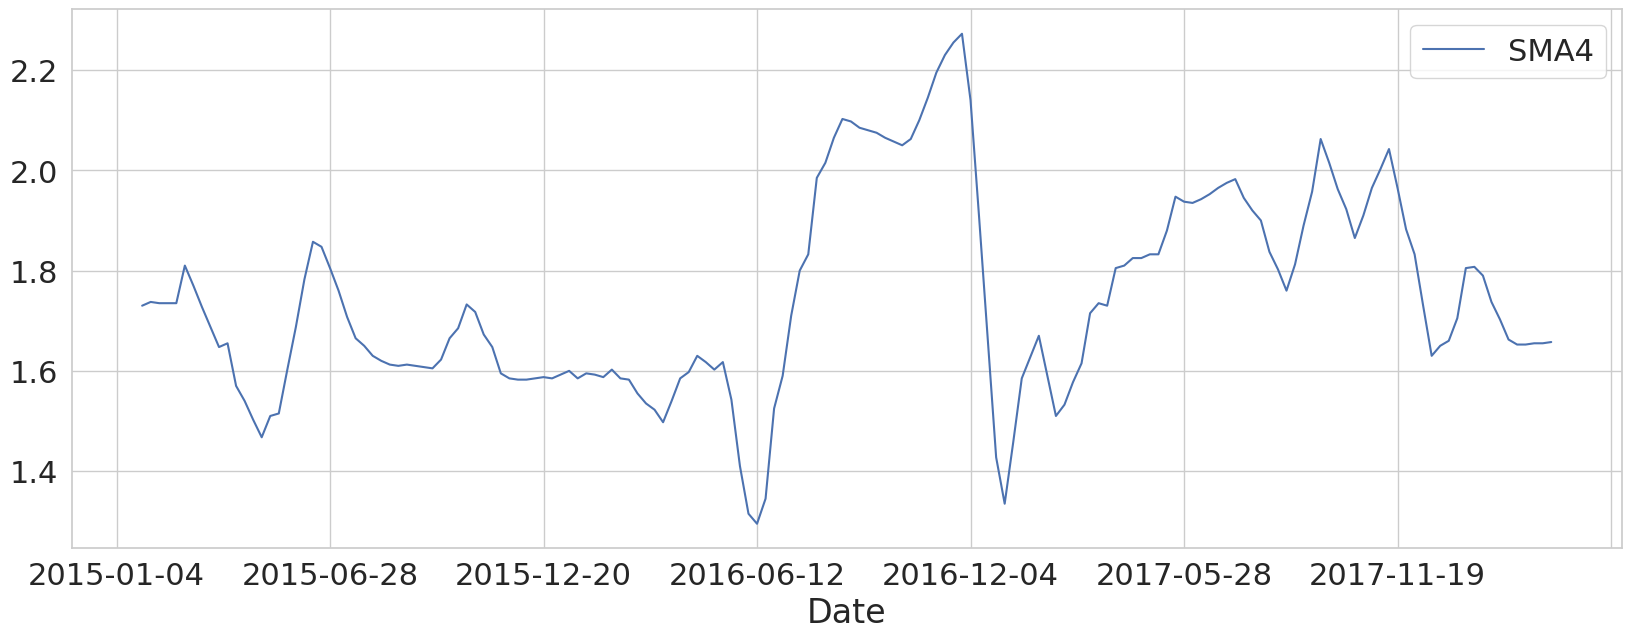

In [24]:
av_organic_Chicago[['SMA4']].plot() #график скользящей средней с окном 4

<Axes: xlabel='Date'>

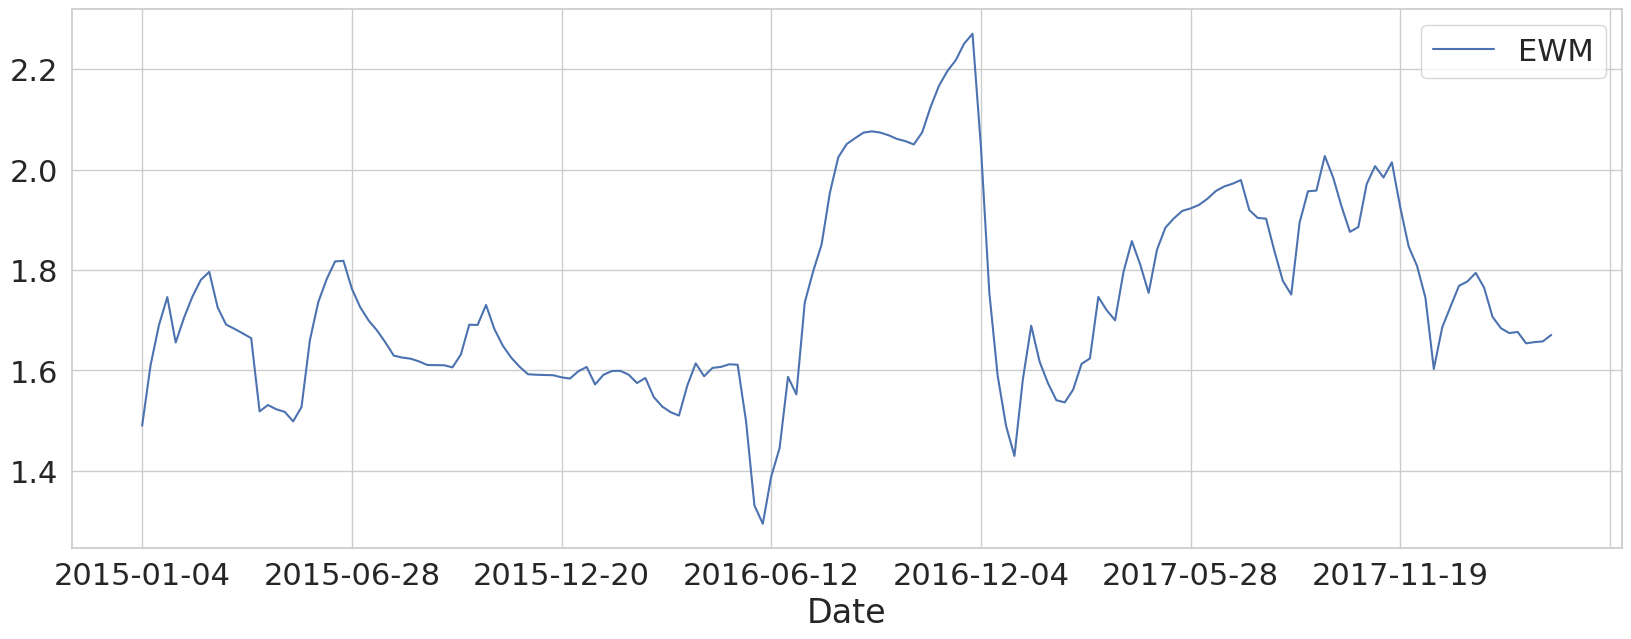

In [26]:
av_organic_Chicago[['EWM']].plot()#график экспоненциальной скользящей средней с параметром span=4

7) 💀 Сложное задание! 💀<br>
Далее будем работать с данными по опозданиям в заключении сделок!<br>
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных<br>

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.<br>
Могут понадобиться:<br>
pd.to_timedelta()<br>
pd.Series.str


In [27]:
delays = pd.read_csv('delays.csv')

In [33]:
delays.head(5)

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [35]:
delays['delay'] = delays['delay'].str.replace('-', '') #удаляю знак "-"

In [37]:
delays['delay'] = pd.to_timedelta(delays.delay)#перевожу дату в дату

In [38]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   client_id   264 non-null    int64          
 1   company_id  264 non-null    int64          
 2   delay       264 non-null    timedelta64[ns]
 3   revenue     264 non-null    int64          
dtypes: int64(3), timedelta64[ns](1)
memory usage: 8.4 KB


In [39]:
delays.head(5)

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


8) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical<br>
Могут понадобится:<br>
pd.cut()


In [ ]:
#сразу разбила на 4 периода с заменой названия

9) 💀 Сложное задание! 💀<br>
Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были<br>
'less than 1 day' – время от 0 до 1 дня<br>
'1-2 days' – от 1 до 2 дней<br>
'2-3 days' – от 2 до 3 дней<br>
'more than 3 days' – больше 3 дней<br>
Например, для следующего примера:<br>

```
client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543
```

результом будет:<br>

```
client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day
```

Могут понадобится:<br>
pd.cut()<br>
pd.to_timedelta()

In [42]:
delays['delay_categorical'] = pd.cut(delays.delay, 4,
                                  labels=["less than 1 day", "1-2 days", "2-3 days", 'more than 3 days'], ordered=False)
#сразу разбила на 4 периода с заменой названия

In [43]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


10) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.

In [44]:
import plotly.express as px

In [46]:
fig = px.pie(delays, values="delay", names="delay_categorical") #на круговой диаграмме лучше видно процент от общего по категориям

fig.show()